# [Social Media Use and its Effects on Students](https://www.kaggle.com/datasets/adilshamim8/social-media-addiction-vs-relationships)

**Name: Anuj Subedi** <br>
**004009141**

# Importing Libraries

In [16]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Loading the dataset
df = pd.read_csv("Project_data.csv")
df

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4


# Data Cleaning and Wrangling

In [18]:
# Check for missing data
print(f"The number of missing values: \n{df.isnull().sum()}")
# Percentage of missing values
missing_percentage = df.isnull().sum()/len(df)*100
print(missing_percentage)
# Duplicated rows
print(f"The number of duplicated rows = {df.duplicated().sum()}")

The number of missing values: 
Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64
Student_ID                      0.0
Age                             0.0
Gender                          0.0
Academic_Level                  0.0
Country                         0.0
Avg_Daily_Usage_Hours           0.0
Most_Used_Platform              0.0
Affects_Academic_Performance    0.0
Sleep_Hours_Per_Night           0.0
Mental_Health_Score             0.0
Relationship_Status             0.0
Conflicts_Over_Social_Media     0.0
Addicted_Score                  0.0
dtype: float64
The number of duplicated rows =

**There are no columns with missing values or rows that are duplicated on this dataset. Thus, we don't have to worry about this during data analysis.**

In [19]:
# Copying dataframe
df_new = df.copy()

**Since we don't need Student_ID for the purposes of our data analysis, we are dropping it.**

In [20]:
# Dropping Student_ID column:
df_filtered = df_new.drop(columns= ['Student_ID'])
df_filtered
# New datset:
df_filtered.to_csv('Project_data_new.csv', index = False)

During the initial exploration of this dataset, several patterns stood out. The sample is fairly balanced by gender and academic level, but highly diverse in terms of country, with many countries represented by only a few participants. Social media usage also varies widely, with Instagram, TikTok, and Facebook being the most popular platforms. Early observations suggest potential relationships between conflict ratio, sleep duration, and addictive behaviors, raising questions about how demographics, relationship status, or academic performance might influence these outcomes. Some issues emerged as well, such as very small groups for certain countries or categories, which may require grouping for meaningful analysis. Overall, the dataset provides a rich opportunity to explore behavioral patterns and their interactions with demographic and social factors.

# Section I

## Histogram of Distribution of Daily Social Media Usuage

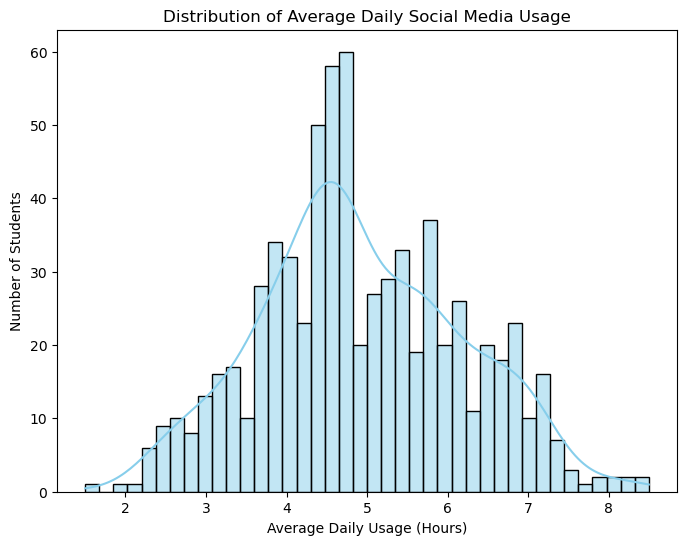

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(df_filtered['Avg_Daily_Usage_Hours'], kde=True, bins=40, color='skyblue')
plt.title('Distribution of Average Daily Social Media Usage')
plt.xlabel('Average Daily Usage (Hours)')
plt.ylabel('Number of Students')
plt.savefig('Hist_Usage_Hours.jpg')
plt.show()

### Interpreation:
- The histogram shows a unimodal distribution with a clear, single peak. The shape is asymmetrical with a slight right skew.
- The most frequent usage level is centered around 4.5 hours per day. The bulk of the student population is concentrated in the 3 to 7-hour range.
-  The right skew indicates that while the most common usage is high, there is a "tail" of students who engage in extremely high levels of daily use (7+ hours), pulling the average usage higher than the median.


### Story insight:
This histogram establishes a critical baseline for our story: heavy social media use is the norm for this student population, not the exception. The most common behavior is spending nearly 5 hours a day on social media. This finding gives significant weight to the subsequent analysis, as the negative correlations we uncover are not just affecting a few outliers but are relevant to the largest and most typical group of students in the dataset.


## Bar chart of Most Used Plaftoms

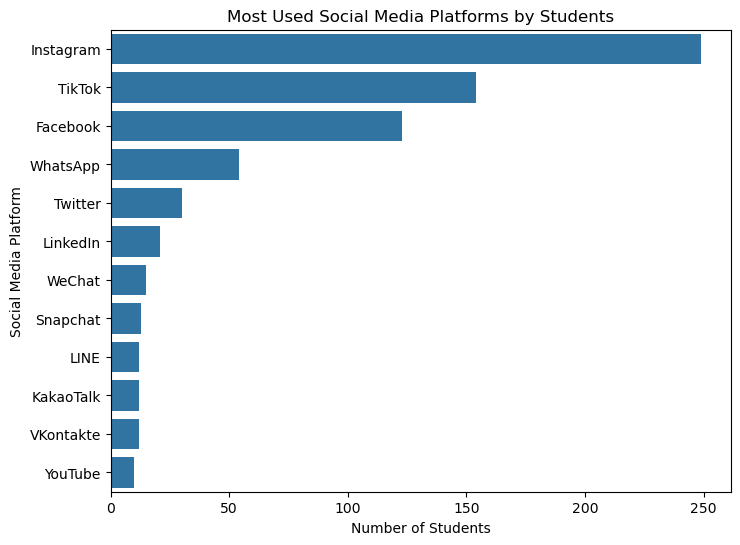

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(y='Most_Used_Platform', data=df_filtered, order=df_filtered['Most_Used_Platform'].value_counts().index)
plt.title('Most Used Social Media Platforms by Students')
plt.xlabel('Number of Students')
plt.ylabel('Social Media Platform')
plt.savefig('Bar_Platforms.jpg')
plt.show()

### Interpretation:
- The chart clearly displays a ranked hierarchy of platform popularity. 
- Instagram is the dominant platform, used by the most students. TikTok and Facebook are the second and third most used platforms, respectively. Together, these top three platforms represent the vast majority of primary student engagement.
- There is a substantial drop in the number of primary users after the top three, with platforms like WhatsApp, Twitter, and LinkedIn having a much smaller share.

### Story Insight:
This bar chart is essential for framing our narrative. It tells us that when we analyze the "effects of social media," we are primarily investigating the impact of Instagram, TikTok, and Facebook. This allows our story to be more focused and specific, linking the well-being metrics we explore later directly to the platforms where students spend the most time and energy.

## Boxplot of Average Usuage by Academic Effect

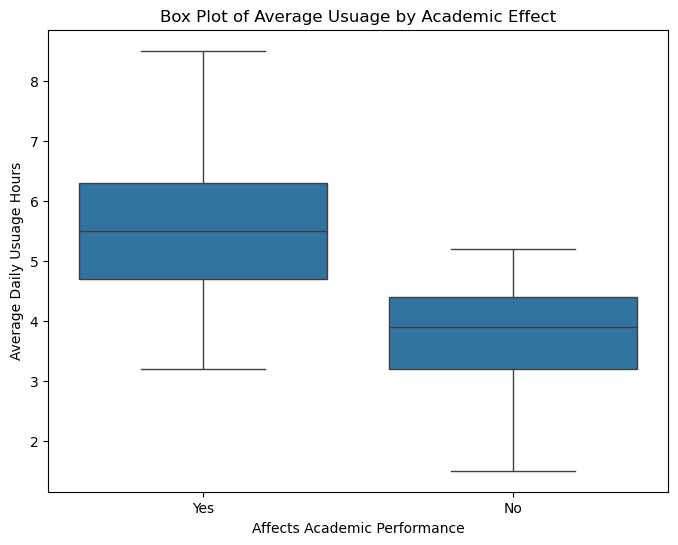

In [9]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Affects_Academic_Performance', y='Avg_Daily_Usage_Hours', data=df_filtered)
plt.title("Box Plot of Average Usuage by Academic Effect")
plt.xlabel("Affects Academic Performance")
plt.ylabel("Average Daily Usuage Hours")
plt.savefig("Bplot_Usuage_AcademicEffect.jpg")
plt.show()

### Interpretation:
**Median Difference:** <br>
- The median daily social media usage is higher for students who report that social media affects their academic performance (“Yes”) compared to those who report no effect (“No”).
- This suggests that students who experience academic impact tend to use social media more hours per day on average.

**IQR (Interquartile Range):** <br>
- The IQR for the “Yes” group is larger, meaning their usage levels vary more widely.
- The “No” group has a narrower IQR, indicating that most students who say social media does not affect their academics cluster around similar (lower) usage hours.
- This variation suggests that academic interference is more common when usage becomes inconsistent or exceeds typical patterns.

**Outliers:** <br>
- There are no visible outliers.
- The “Yes” group shows higher maximum values, indicating some students use social media up to 8–9 hours daily.
- These high-end users act like “outliers,” representing students whose extremely high usage is more likely to disrupt academic performance.
- The “No” group lacks those extreme upper values, reinforcing the difference between groups.

**Whiskers:** <br>
- The whiskers for the “Yes” group extend further upward, showing that they have higher overall maximum usage and that some students regularly exceed 7–8 hours of use.
- The “No” group has much shorter whiskers, indicating lower overall range and more consistent and moderate usage patterns.

### Story Insight
This box plot suggests a clear pattern: students who report academic harm from social media tend to use it significantly more and with greater variability than those who do not report harm. The wider spread and higher values in the “Yes” group highlight that excessive or irregular social media use may play a meaningful role in disrupting academic focus and performance. Students with the most intensive usage tend to report greater academic strain, likely reflecting interconnected factors such as poor sleep quality, lower focus, and increased daily stress that we studied with the **heatmap**.

## Boxplot of Average Usuage by Gender

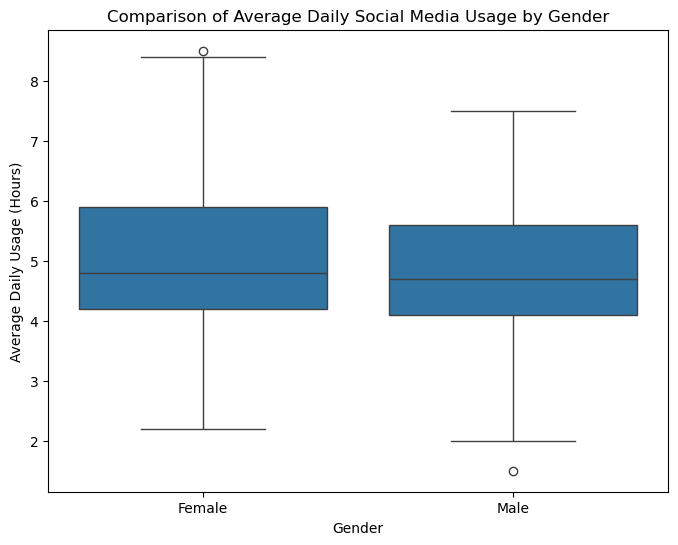

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Avg_Daily_Usage_Hours', data=df_filtered)
plt.title('Comparison of Average Daily Social Media Usage by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Daily Usage (Hours)')
plt.savefig('Boxplot_Usage_Gender.jpg')
plt.show()

### Interpretation:
- Median Difference: The median usage (the line inside the box) is nearly identical for both male and female students, sitting just below 5 hours per day.
- IQR (Interquartile Range): The IQRs (the height of the boxes) for both groups are of somewhat similar size, indicating that the variability in usage for the middle 50% of students is somewhat comparable across genders even though the variability is slightly higher for female students. 
- Whiskers: The whiskers for both groups extend to similar minimum but the maximum for female students is higher. The few outliers do not change the overall picture.

### Story Insight:
Gender alone does not seem like a strong predictor of usage in this sample. Instead, social media habits may be shaped more by personal lifestyle, personality, or platform preference, rather than gender identity.

## Bar Plot of Average Addiction Score by Academic Level

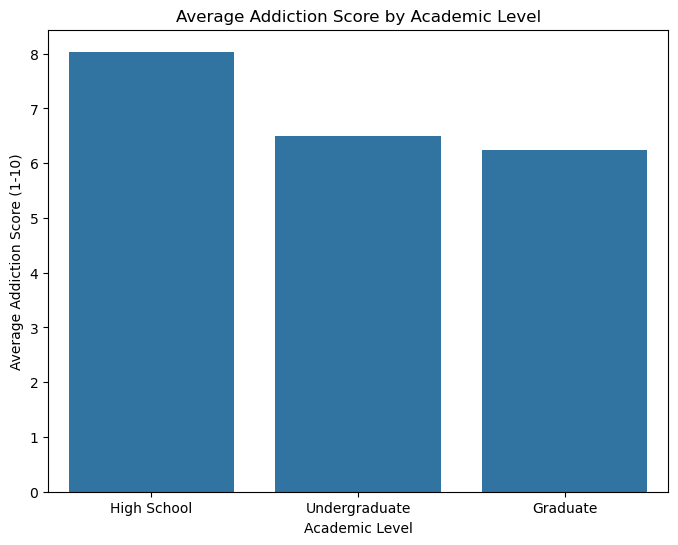

In [11]:
academic_addiction = df_filtered.groupby('Academic_Level')['Addicted_Score'].mean().reindex(['High School', 'Undergraduate', 'Graduate']).reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Academic_Level', y='Addicted_Score', data=academic_addiction)
plt.title('Average Addiction Score by Academic Level')
plt.xlabel('Academic Level')
plt.ylabel('Average Addiction Score (1-10)')
plt.savefig('GroupedBar_Addiction_Academic.jpg')
plt.show()

### Interpretation:
- High School students in this sample show the highest average addiction score, followed by Undergraduates, and then Graduates with the lowest score.
- As noted in the data exploration phase, the High School group is very small (n=27). Therefore, the high bar for this group may be due to a few extreme users and may not be representative.
- The more statistically reliable trend is the slight decrease in average addiction scores from the Undergraduate level to the Graduate level.

### Story Insight:
This chart suggests that the undergraduate experience correlates with slightly higher levels of social media dependence compared to graduate studies. The lower scores for graduate students might indicate that increased academic rigor, different social structures, or maturity lead to more controlled usage patterns, but the difference is not signigicant enough to draw rigid conclusions. 

# Bar Plot of Average Mental Health Score by Platform

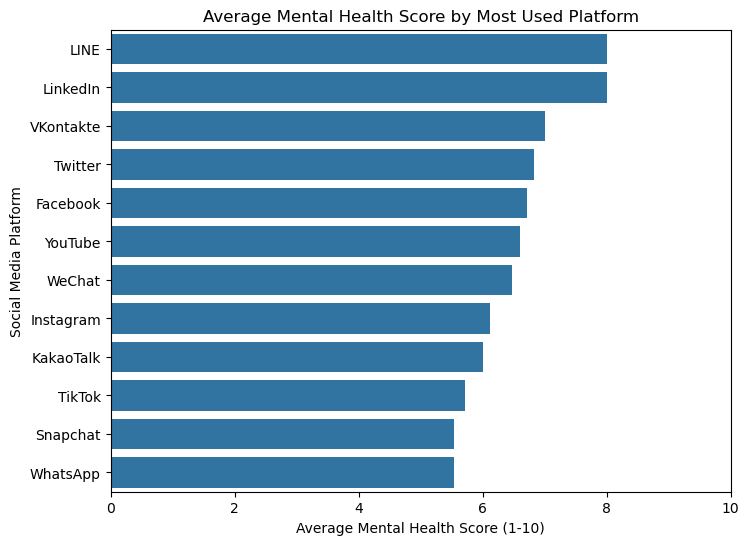

In [12]:
platform_health = df_filtered.groupby('Most_Used_Platform')['Mental_Health_Score'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='Mental_Health_Score', y='Most_Used_Platform', data=platform_health)
plt.title('Average Mental Health Score by Most Used Platform')
plt.xlabel('Average Mental Health Score (1-10)')
plt.ylabel('Social Media Platform')
plt.xlim(0, 10)
plt.savefig('GroupedBar_Health_Platform.jpg')
plt.show()

### Interpretation:
- The chart ranks the platforms by the average self-reported mental health score of their primary users (where a higher score is better).
- Platforms often used for specific functions or professional networking (LINE, LinkedIn, VKontakte, Twitter) are associated with higher average mental health scores.
- Platforms that are heavily visual and entertainment-driven (WhatsApp, Snapchat, TikTok, Instagram) are associated with the lowest average mental health scores.

### Story Insight:
This visualization introduces a critical nuance to our story that the type of social media platform seems to matter. It suggests that not all social media is created equal in its relationship with mental well-being. However, since not all social media platforms have a significant number of data points, data can be misleading. 

# Section II

## Heatmap of Correlations

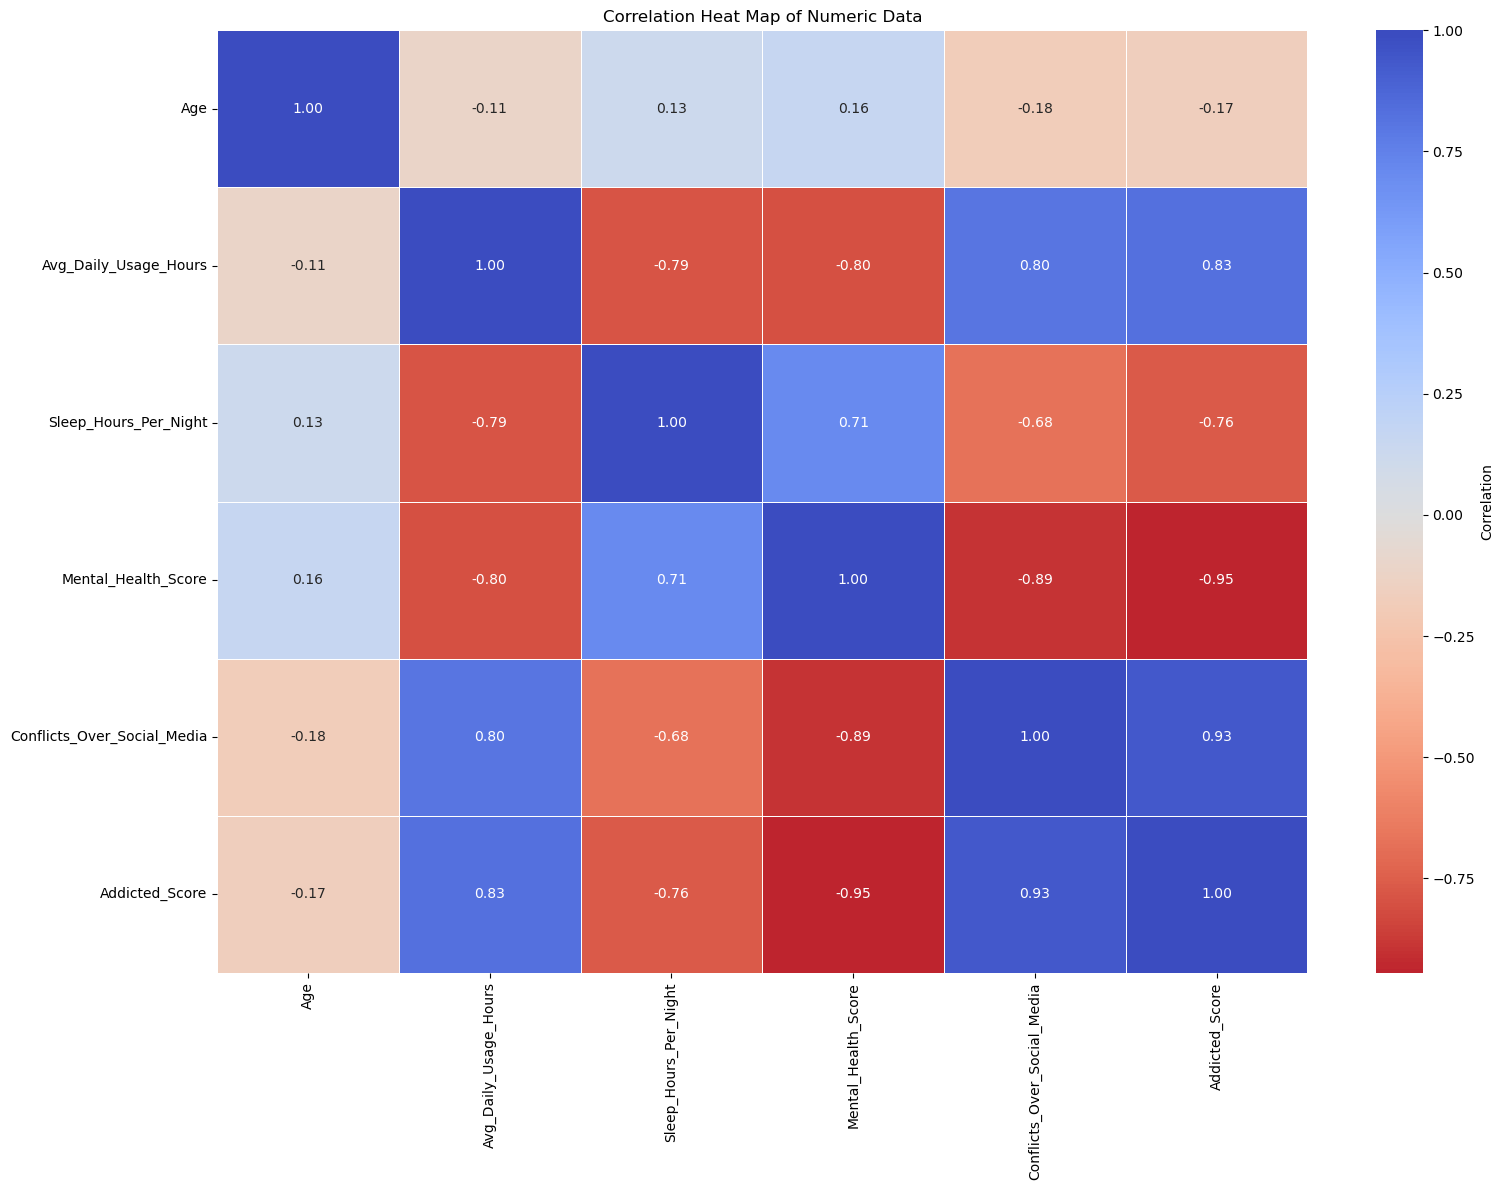

In [13]:
corr_matrix= df_filtered.corr(numeric_only=True)
plt.figure(figsize=(16,12))
ax = sns.heatmap(
    corr_matrix, annot=True, fmt=".2f",
    cmap="coolwarm_r", center=0,
    linewidths=0.5, cbar_kws={"label": "Correlation"}
)
plt.title("Correlation Heat Map of Numeric Data")
plt.tight_layout()
plt.savefig('Corr_heatmap.jpg')
plt.show()

### Correlation Insights:

- Avg_Daily_Usage_Hours and Mental_Health_Score → strong negative correlation
→ individuals who spend more hours on social media tend to report significantly poorer mental health.

- Avg_Daily_Usage_Hours and Sleep_Hours_Per_Night → strong negative correlation
→ higher social media usage is associated with reduced sleep duration.

- Avg_Daily_Usage_Hours and Addicted_Score → strong positive correlation
→ heavier users show higher indicators of social media addiction.

- Avg_Daily_Usage_Hours and Conflicts_Over_Social_Media → strong positive correlation
→ those who use social media more frequently experience more interpersonal conflicts related to it.

- Sleep_Hours_Per_Night and Mental_Health_Score → strong positive correlation
→ individuals who sleep more tend to exhibit better mental health.

- Addicted_Score and Mental_Health_Score → extremely strong negative correlation
→ higher addiction levels strongly coincide with poorer mental health outcomes.

- Age and all variables → weak correlations
→ age does not strongly influence usage patterns, sleep, addiction, mental health, or conflict.

### Story insight:
This heat map suggests that heavy social media use is a central factor shaping well-being, driving poorer mental health, reduced sleep, increased addiction, and more frequent conflicts. These conflict-related behaviors appear to reinforce each other, creating a feedback loop. Meanwhile, age plays a minimal role, indicating that these patterns are consistent across different age groups.

# Scatter Plot of Addiction and Mental Health

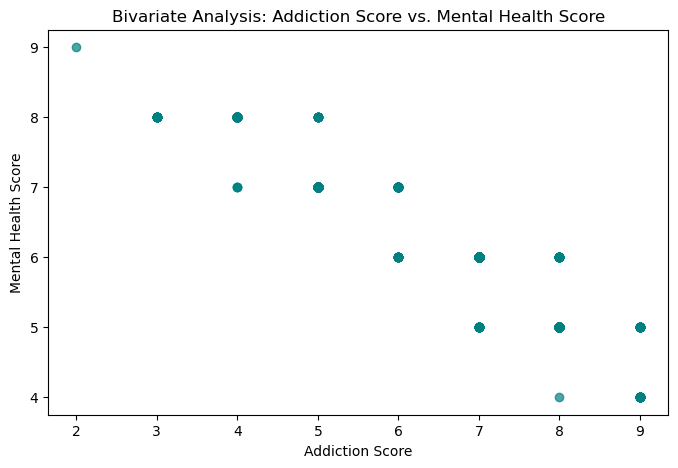

In [14]:
plt.figure(figsize=(8, 5))
plt.scatter(df_filtered['Addicted_Score'], df_filtered['Mental_Health_Score'], alpha=0.7, color='teal')
plt.title('Bivariate Analysis: Addiction Score vs. Mental Health Score')
plt.xlabel('Addiction Score')
plt.ylabel('Mental Health Score')
plt.savefig('Addiction_vs_MentHealth.jpg')
plt.show()

### Interpretation:
- The plot reveals a clear, strong negative correlation between the two variables. The points form a distinct downward-sloping pattern from the top-left to the bottom-right.
- The points are tightly clustered, indicating a very strong relationship. There is very little deviation from the main trend.

### Story Insight:
This scatter plot is the most powerful piece of evidence in the analysis. It visually confirms the extremely strong correlation (-0.95) found in the heatmap and serves as the "smoking gun" for the project's central theme. The tight clustering makes things very clear. For this group of students, higher levels of social media addiction are directly and powerfully associated with poorer mental well-being.

## Daily Usage vs. Sleep per Night by Academic Level (Multivariate Scatter Plot)

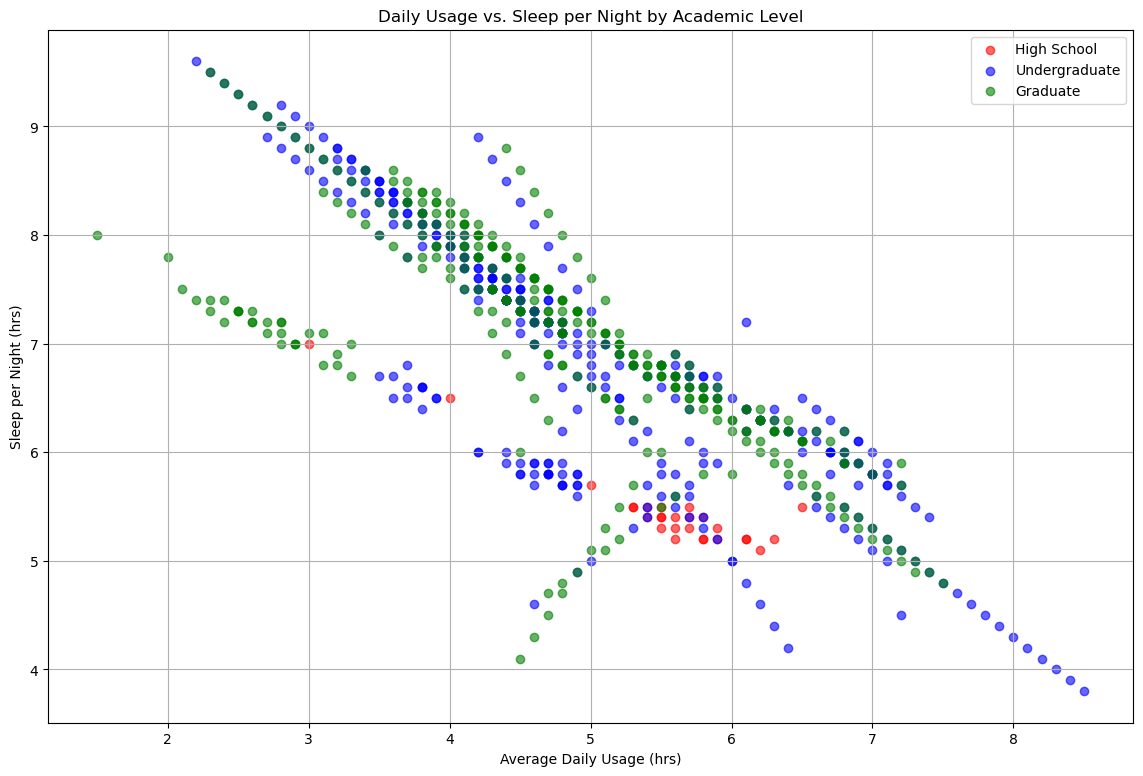

In [15]:
# Create color masks
high= df_filtered['Academic_Level'] == 'High School'
ugrad = df_filtered['Academic_Level'] == 'Undergraduate'
grad= df_filtered['Academic_Level'] == 'Graduate'


plt.figure(figsize=(14, 9))

# Plot each academic level
plt.scatter(df_filtered['Avg_Daily_Usage_Hours'][high], df_filtered['Sleep_Hours_Per_Night'][high],
            color='red', alpha=0.6, label='High School')

plt.scatter(df_filtered['Avg_Daily_Usage_Hours'][ugrad], df_filtered['Sleep_Hours_Per_Night'][ugrad],
            color='blue', alpha=0.6, label='Undergraduate')

plt.scatter(df_filtered['Avg_Daily_Usage_Hours'][grad], df_filtered['Sleep_Hours_Per_Night'][grad],
            color='green', alpha=0.6, label='Graduate')

# Add legend and labels
plt.title("Daily Usage vs. Sleep per Night by Academic Level")
plt.xlabel("Average Daily Usage (hrs)")
plt.ylabel("Sleep per Night (hrs)")
plt.legend()
plt.grid(True)
plt.savefig('UsagevsSleep_Academic.jpg')
plt.show()

### Interpretation:
- This scatterplot demonstrates a strong negative correlation between daily usage hours and sleep duration across all academic levels.
- As usage increases from 2 to 8+ hours, sleep decreases from approximately 9-10 hours to as little as 4 hours.
- Notably, high school students (red), though represented by fewer data points, tend to get less sleep than graduate and undergraduate students at comparable usage levels, suggesting they may face additional sleep constraints beyond screen time, such as early school start times or heavier academic schedules.
- Graduate students (green) show somewhat consistent patterns.
- Undergraduates show highest daily usage hours and greatest variability, with some extreme cases of 8+ hours usage and minimal sleep.

### Story Insight:
This multivariate plot demonstrates the universal nature of the trade-off between social media and sleep. The negative relationship holds true for high schoolers, undergraduates, and graduate students alike. It tells a compelling story that regardless of academic level, spending more time on social media consistently comes at the cost of sleep, a foundational component of both academic success and mental health.